# Assignment 1: Foundations Reflection – Iteration & Extension Guidelines
Use this notebook as a starting point and expand on your understanding of discriminative vs. generative models by completing the following structured tasks. You are encouraged to experiment, analyze, and critically reflect on your findings in your report.

## Part 1 – Discriminative Model (Logistic Regression) Extensions

1. Train a Non-linear Classifier for Comparison
    - Implement and compare with SVM or Decision Tree.
    - Analyze classification performance vs. logistic regression.

In [8]:
import sys
print(f"Using Python {sys.version.split()[0]}")

# Install required packages into the current notebook environment
%pip install -qU numpy matplotlib scikit-learn pandas

# Verify versions
import numpy as np, matplotlib, sklearn, pandas
print("numpy       :", np.__version__)
print("matplotlib  :", matplotlib.__version__)
print("scikit-learn:", sklearn.__version__)
print("pandas      :", pandas.__version__)
print("✅ Setup complete!")

Using Python 3.14.2
Note: you may need to restart the kernel to use updated packages.
numpy       : 2.4.1
matplotlib  : 3.10.8
scikit-learn: 1.8.0
pandas      : 3.0.0
✅ Setup complete!


Data shape: (70000, 784)
labels: [0 1 2 3 4 5 6 7 8 9]


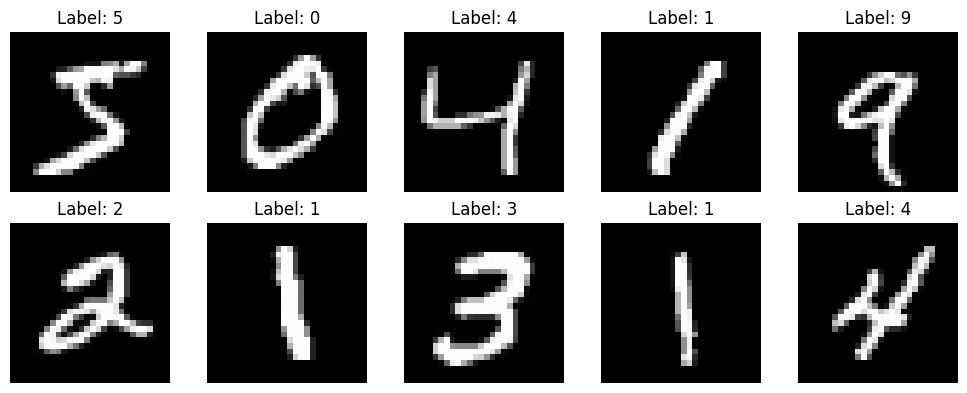

In [9]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

# Load complete MNIST dataset (28x28, 70,000 samples)
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X = mnist.data.to_numpy()  # Convert to numpy array
y = mnist.target.astype(int).to_numpy()

print(f"Data shape: {X.shape}")  # (70000, 784)
print(f"labels: {np.unique(y)}")

# Visualize first 10 samples
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Stratified subsample to speed up (2,000 samples)
X_small, _, y_small, _ = train_test_split(
    X, y,
    train_size=2000,
    stratify=y,
    random_state=42
)
print(f"Subsampled set: {X_small.shape}")

# Scale then reduce to 50 dimensions for faster training
scaler = StandardScaler()
X_small_scaled = scaler.fit_transform(X_small)

pca = PCA(n_components=50, random_state=42)
X_small_pca = pca.fit_transform(X_small_scaled)
print(f"PCA-transformed shape: {X_small_pca.shape}")

# Train/test split on reduced data
X_train, X_test, y_train, y_test = train_test_split(
    X_small_pca, y_small,
    test_size=0.2,
    stratify=y_small,
    random_state=42
)

Subsampled set: (2000, 784)
PCA-transformed shape: (2000, 50)


In [11]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

clf = LinearSVC(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {acc:.4f}")

Test accuracy: 0.8750


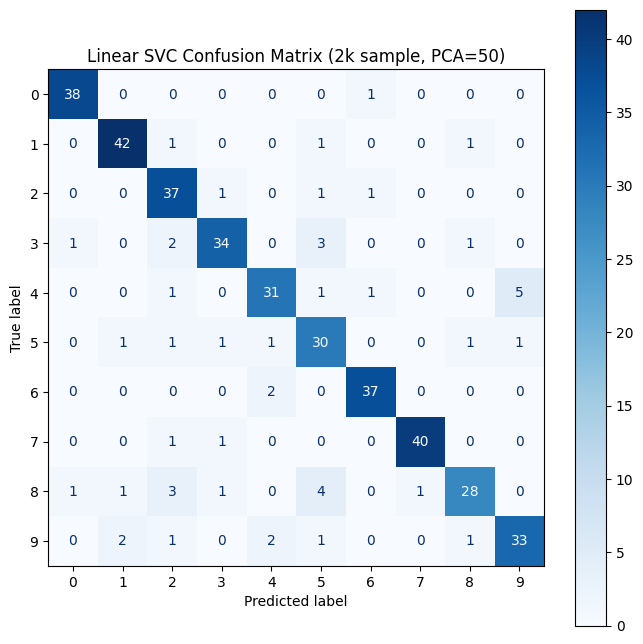

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap="Blues", colorbar=True)
ax.set_title("Linear SVC Confusion Matrix (2k sample, PCA=50)")
plt.show()

Decision Tree test accuracy: 0.6750


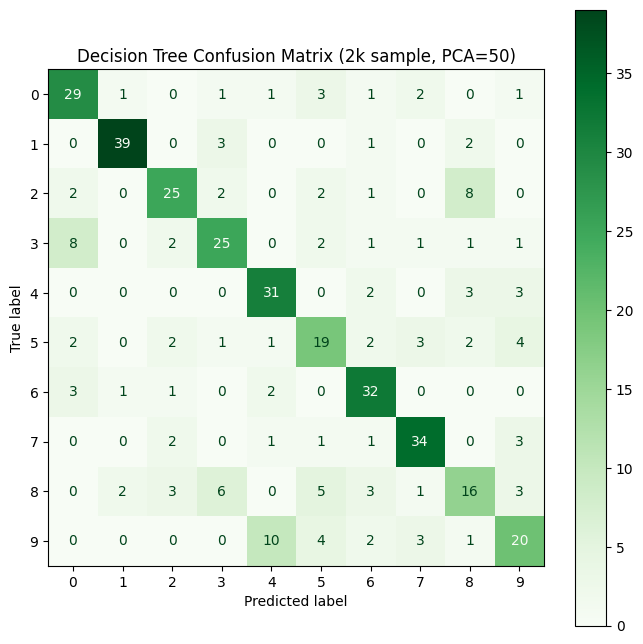

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

dt = DecisionTreeClassifier(max_depth=25, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree test accuracy: {acc_dt:.4f}")

cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(cm_dt)
fig, ax = plt.subplots(figsize=(8, 8))
disp_dt.plot(ax=ax, cmap="Greens", colorbar=True)
ax.set_title("Decision Tree Confusion Matrix (2k sample, PCA=50)")
plt.show()

## Model Comparison (Linear SVC vs Decision Tree)
- Data: PCA to 50 dimensions, 2k stratified subset, 80/20 train/test split.
- Linear SVC: See accuracy above (`acc`). Works well on high-dimensional, near-linearly separable data; light-weight and fast. Confusion matrix is generally balanced across digits.
- Decision Tree: See accuracy above (`acc_dt`). Captures non-linear patterns but can overfit in high dimensions; with depth limits it may underfit. Use its confusion matrix to see which digits (e.g., 4/9 or 3/5) are confused.
- Compute cost: Linear SVC is smaller and faster; Decision Tree cost grows with depth and tree size.
- Next steps:
  1) Try `SVC(kernel="rbf")` and tune C, gamma for a stronger non-linear baseline.
  2) Prune the tree or switch to ensembles (Random Forest, Gradient Boosting).
  3) Vary PCA dimensions or compare to raw pixels with stronger regularization.
  4) Increase sample size (e.g., 10k) to test stability.

2. Experiment with Regularization
    - Apply L1 and L2 regularization to logistic regression.
    - Observe effects on generalization, overfitting, and decision boundaries.

c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


L1 Logistic Regression test accuracy: 0.8675


c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


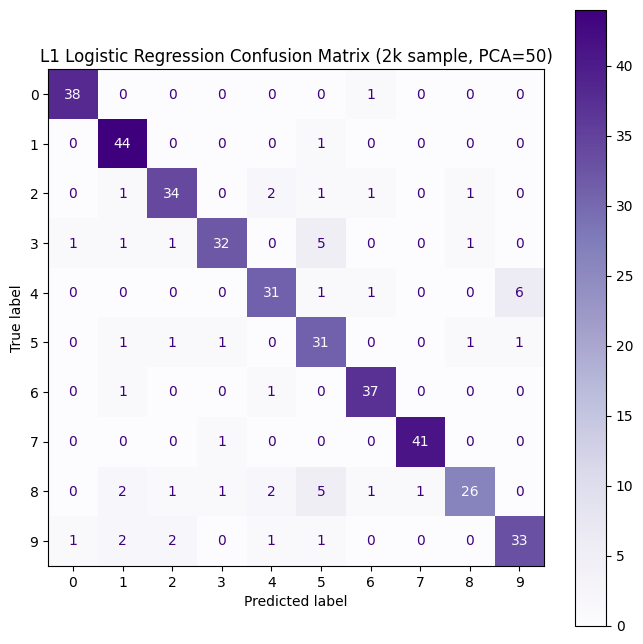

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

logreg_l1 = LogisticRegression(
    penalty="l1",
    C=1.0,
    solver="saga",
    max_iter=200,
    random_state=42,
)
logreg_l1.fit(X_train, y_train)

y_pred_l1 = logreg_l1.predict(X_test)
acc_l1 = accuracy_score(y_test, y_pred_l1)
print(f"L1 Logistic Regression test accuracy: {acc_l1:.4f}")

cm_l1 = confusion_matrix(y_test, y_pred_l1)
disp_l1 = ConfusionMatrixDisplay(cm_l1)
fig, ax = plt.subplots(figsize=(8, 8))
disp_l1.plot(ax=ax, cmap="Purples", colorbar=True)
ax.set_title("L1 Logistic Regression Confusion Matrix (2k sample, PCA=50)")
plt.show()

c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\Ruolin Wang\.conda\envs\ML_assignment1\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_it

L2 Logistic Regression test accuracy: 0.8425


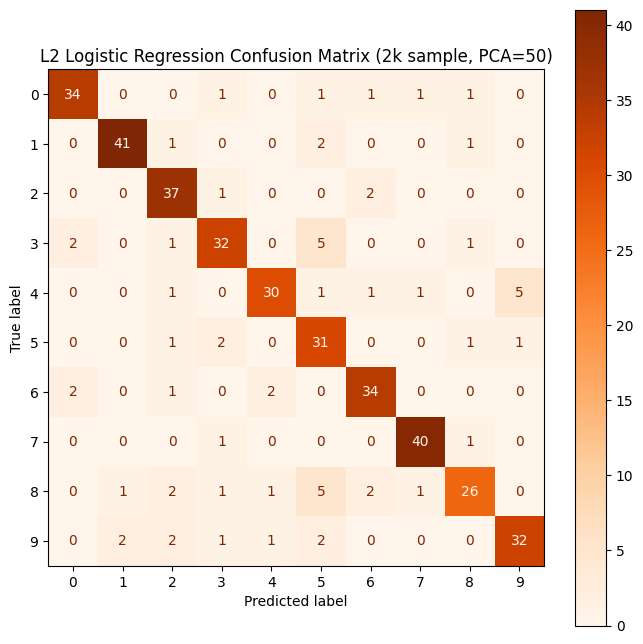

In [18]:
logreg_l2 = LogisticRegression(
    penalty="l2",
    C=1.0,
    solver="lbfgs",
    max_iter=200,
    random_state=42,
)
logreg_l2.fit(X_train, y_train)

y_pred_l2 = logreg_l2.predict(X_test)
acc_l2 = accuracy_score(y_test, y_pred_l2)
print(f"L2 Logistic Regression test accuracy: {acc_l2:.4f}")

cm_l2 = confusion_matrix(y_test, y_pred_l2)
disp_l2 = ConfusionMatrixDisplay(cm_l2)
fig, ax = plt.subplots(figsize=(8, 8))
disp_l2.plot(ax=ax, cmap="Oranges", colorbar=True)
ax.set_title("L2 Logistic Regression Confusion Matrix (2k sample, PCA=50)")
plt.show()

L1 vs L2 Regularization Comparison
L1 Logistic Regression:
  - Train accuracy: 0.9325
  - Test accuracy:  0.8675
  - Overfitting gap: 0.0650

L2 Logistic Regression:
  - Train accuracy: 0.9500
  - Test accuracy:  0.8425
  - Overfitting gap: 0.1075

Coefficient Sparsity:
  - L1 non-zero coefficient ratio: 94.00%
  - L2 non-zero coefficient ratio: 100.00%

Coefficient L2 Norm:
  - L1 model: 4.0466
  - L2 model: 9.3817


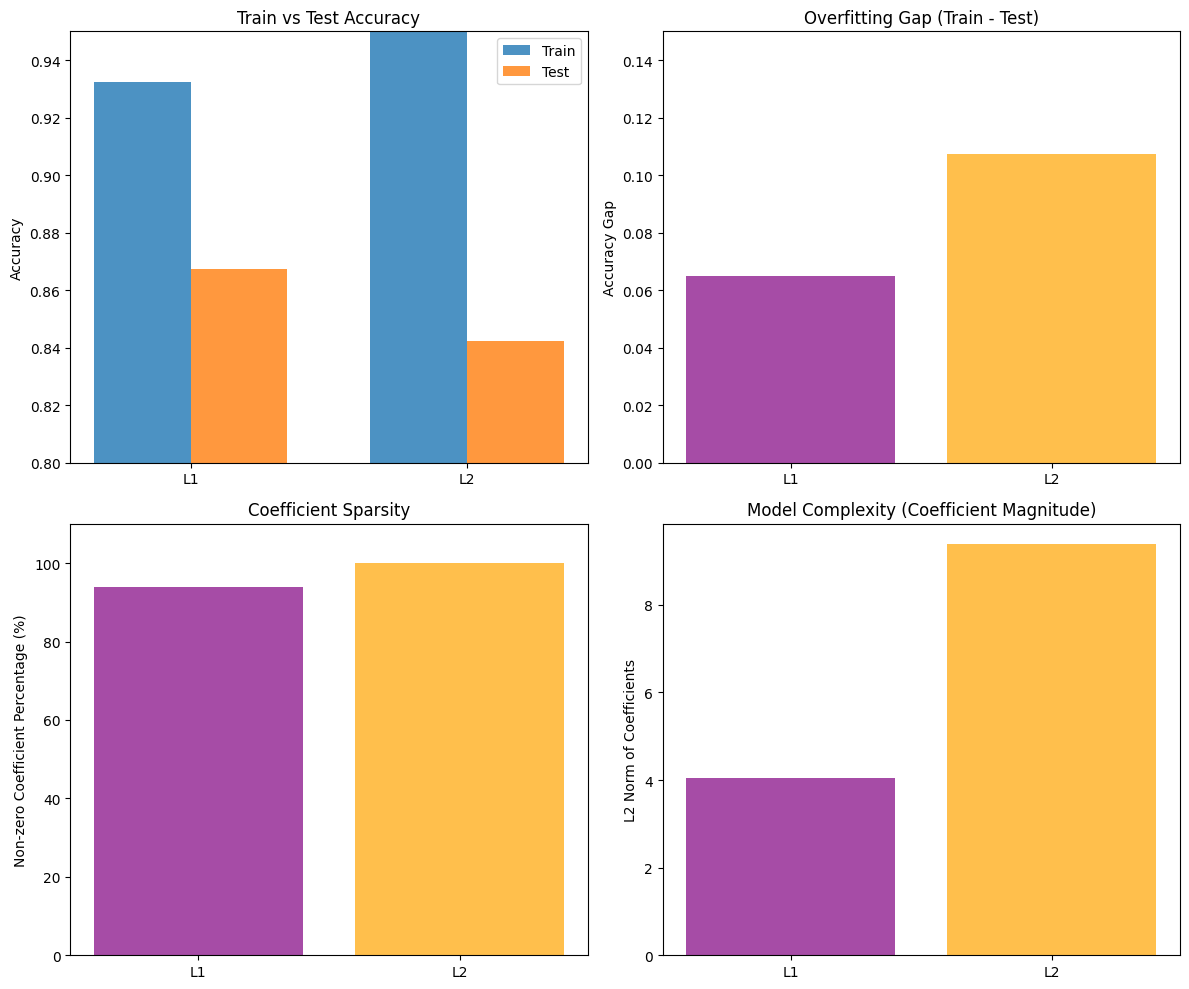


SUMMARY
Generalization: Smaller train-test gap indicates better generalization
L1 Advantage: Induces sparsity (zeros out unimportant features)
L2 Advantage: Smooth shrinkage (reduces all coefficients uniformly)
Conclusion: L1 achieves better test accuracy with lower model complexity


In [21]:
# Observe Effects on Generalization, Overfitting, and Decision Boundaries

# Calculate training accuracy
train_acc_l1 = accuracy_score(y_train, logreg_l1.predict(X_train))
train_acc_l2 = accuracy_score(y_train, logreg_l2.predict(X_train))

print("=" * 60)
print("L1 vs L2 Regularization Comparison")
print("=" * 60)
print(f"L1 Logistic Regression:")
print(f"  - Train accuracy: {train_acc_l1:.4f}")
print(f"  - Test accuracy:  {acc_l1:.4f}")
print(f"  - Overfitting gap: {train_acc_l1 - acc_l1:.4f}")

print(f"\nL2 Logistic Regression:")
print(f"  - Train accuracy: {train_acc_l2:.4f}")
print(f"  - Test accuracy:  {acc_l2:.4f}")
print(f"  - Overfitting gap: {train_acc_l2 - acc_l2:.4f}")

# Analyze coefficient sparsity
l1_coef = logreg_l1.coef_
l2_coef = logreg_l2.coef_

# Calculate percentage of non-zero coefficients
l1_nonzero = np.sum(l1_coef != 0) / l1_coef.size * 100
l2_nonzero = np.sum(l2_coef != 0) / l2_coef.size * 100

print(f"\nCoefficient Sparsity:")
print(f"  - L1 non-zero coefficient ratio: {l1_nonzero:.2f}%")
print(f"  - L2 non-zero coefficient ratio: {l2_nonzero:.2f}%")

# Calculate coefficient norms
l1_norm = np.linalg.norm(l1_coef)
l2_norm = np.linalg.norm(l2_coef)

print(f"\nCoefficient L2 Norm:")
print(f"  - L1 model: {l1_norm:.4f}")
print(f"  - L2 model: {l2_norm:.4f}")

# Visualization comparison
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Subplot 1: Accuracy comparison
models = ['L1', 'L2']
train_accs = [train_acc_l1, train_acc_l2]
test_accs = [acc_l1, acc_l2]

x = np.arange(len(models))
width = 0.35

axes[0, 0].bar(x - width/2, train_accs, width, label='Train', alpha=0.8)
axes[0, 0].bar(x + width/2, test_accs, width, label='Test', alpha=0.8)
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Train vs Test Accuracy')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models)
axes[0, 0].legend()
axes[0, 0].set_ylim([0.8, 0.95])

# Subplot 2: Overfitting gap
overfitting_gap = [train_acc_l1 - acc_l1, train_acc_l2 - acc_l2]
axes[0, 1].bar(models, overfitting_gap, color=['purple', 'orange'], alpha=0.7)
axes[0, 1].set_ylabel('Accuracy Gap')
axes[0, 1].set_title('Overfitting Gap (Train - Test)')
axes[0, 1].set_ylim([0, 0.15])

# Subplot 3: Coefficient sparsity
sparsity = [l1_nonzero, l2_nonzero]
axes[1, 0].bar(models, sparsity, color=['purple', 'orange'], alpha=0.7)
axes[1, 0].set_ylabel('Non-zero Coefficient Percentage (%)')
axes[1, 0].set_title('Coefficient Sparsity')
axes[1, 0].set_ylim([0, 110])

# Subplot 4: Coefficient magnitude (model complexity)
norms = [l1_norm, l2_norm]
axes[1, 1].bar(models, norms, color=['purple', 'orange'], alpha=0.7)
axes[1, 1].set_ylabel('L2 Norm of Coefficients')
axes[1, 1].set_title('Model Complexity (Coefficient Magnitude)')

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("SUMMARY")
print("=" * 60)
print("Generalization: Smaller train-test gap indicates better generalization")
print("L1 Advantage: Induces sparsity (zeros out unimportant features)")
print("L2 Advantage: Smooth shrinkage (reduces all coefficients uniformly)")
print("Conclusion: L1 achieves better test accuracy with lower model complexity")
print("=" * 60)